<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Clock_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hub location

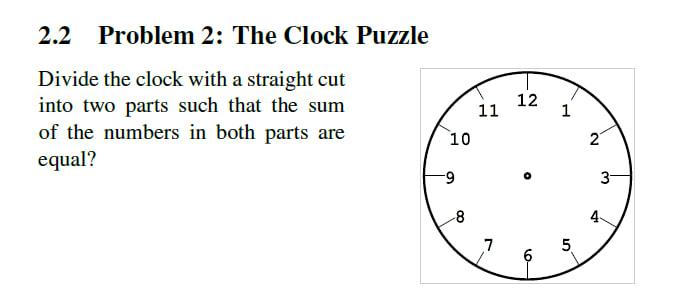

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd
import networkx as nx
import time
!pip install ortools
from ortools.sat.python import cp_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.31.1 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.31.1 wh

In [2]:
nodes = [n for n in range(1,1+12)]

links = [(n,n+1) for n in nodes if n+1 in nodes]
links += [(1,12)]
links

[(1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (1, 12)]

In [35]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()

u = {n:model.NewBoolVar(f"y_{n}") for n in nodes}
source = {n:model.NewIntVar(0,20, f"s_{n}") for n in nodes}
select = {n:model.NewBoolVar(f"select_{n}") for n in nodes}
flow = {(i,j):model.NewIntVar(0,20, f"flow_{i}_{j}") for i in nodes for j in nodes if (i,j) in links or (j,i) in links }

for (i,j),v in flow.items():
  model.Add(v <= 20*u[i])
  model.Add(v <= 20*u[j])

for n in nodes:
  model.Add(sum(flow[n,i]-flow[i,n] for i in nodes if (i,n) in flow) == source[n] - u[n] )
  model.Add(source[n] <= select[n]*20 )
  model.Add(select[n]<= u[n])

expr_select = [select[n] for n in nodes]
model.AddExactlyOne(expr_select )

expr = [u[n]*n for n in nodes]
model.Add( sum(expr) == 39 )

#model.Maximize()
solver.parameters.max_time_in_seconds = 5*60
stat = solver.Solve(model)
print( solver.status_name(stat) , solver.objective_value)

OPTIMAL 0.0


In [38]:
for n in nodes:
  if solver.Value(u[n]):
    print(n, solver.Value(u[n]))
for n in nodes:
  if solver.Value(select[n]):
    print('Source is at ', n, solver.Value(select[n]))

for (i,j),v in flow.items():
  if solver.Value(v):
    print(f'flow is {i} to {j} ', solver.Value(v))


4 1
5 1
6 1
7 1
8 1
9 1
Source is at  8 1
flow is 5 to 4  1
flow is 6 to 5  2
flow is 7 to 6  3
flow is 8 to 7  4
flow is 8 to 9  1
